In [12]:
# Imports
import os
import zipfile
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from pathlib import Path
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [13]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Path to dataset
base_dir = pathlib.Path("data/cats_and_dogs_small")
train_dir = base_dir / "train"
val_dir = base_dir / "validation"
test_dir = base_dir / "test"


# Now Add EDA Code Based on That Directory Structure
1. Show Sample Images

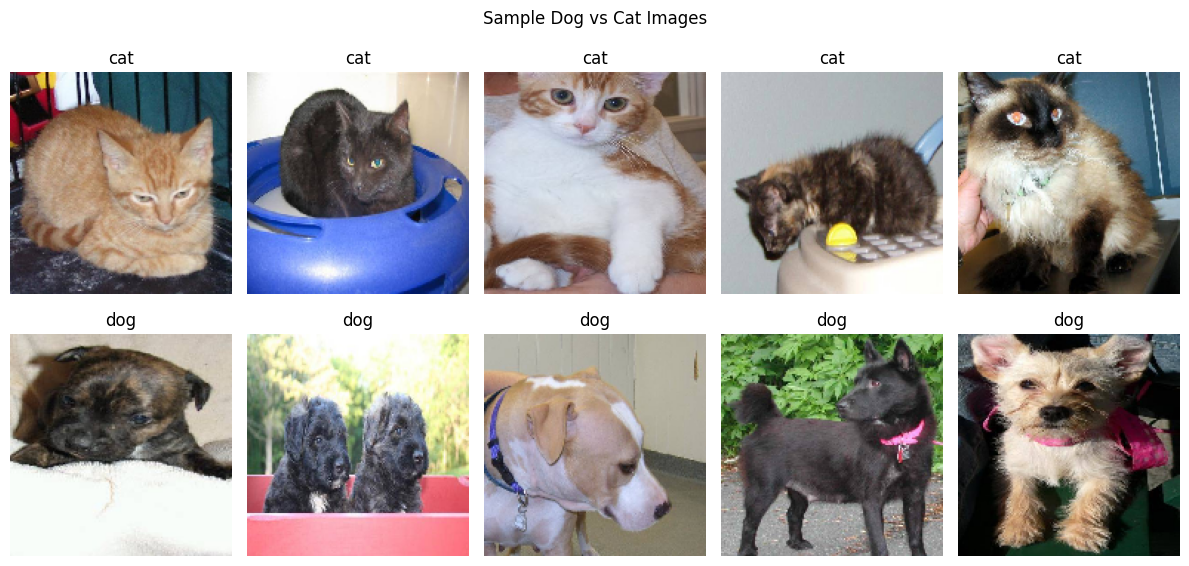

Average Width: 401.73, Height: 358.24


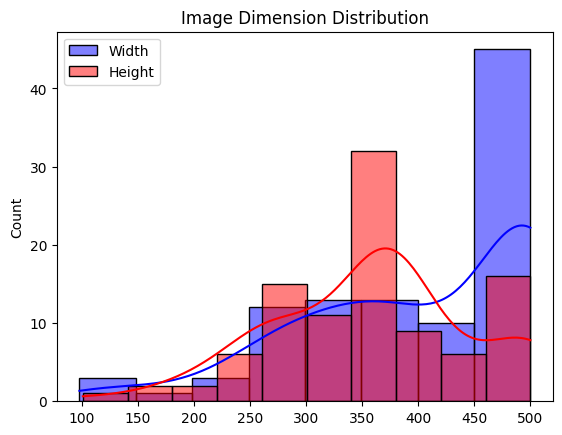

In [15]:
# Show 10 sample images
sample_paths = []
for category in ['cat', 'dog']:
    folder = train_dir / category
    sample_paths.extend(random.sample(list(folder.glob("*.jpg")), 5))

plt.figure(figsize=(12, 6))
for i, path in enumerate(sample_paths):
    img = load_img(path, target_size=(150, 150))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(path.parent.name)
    plt.axis('off')
plt.suptitle("Sample Dog vs Cat Images")
plt.tight_layout()
plt.show()

# Image dimensions
sizes = []
sample_images = list((train_dir / "cat").glob("*.jpg"))[:50] + list((train_dir / "dog").glob("*.jpg"))[:50]
for img_path in sample_images:
    with Image.open(img_path) as img:
        sizes.append(img.size)

widths, heights = zip(*sizes)
print(f"Average Width: {np.mean(widths):.2f}, Height: {np.mean(heights):.2f}")
sns.histplot(widths, label="Width", color="blue", kde=True)
sns.histplot(heights, label="Height", color="red", kde=True)
plt.title("Image Dimension Distribution")
plt.legend()
plt.show()


## 2. Class Distribution

In [17]:
img_height, img_width = 150, 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')

val_generator = datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary', shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## 3. Image Size Distribution (Optional but Insightful)

## Standerize the data

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

# Define the correct base path
new_base_dir = pathlib.Path("data/cats_and_dogs_small")

# Image size and batch size
img_height, img_width = 150, 150
batch_size = 32

# Create data generators for each subset
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    new_base_dir / "train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    new_base_dir / "validation",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


#  Step 1: Define and Train Your Own CNN Model (with callbacks)

In [22]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a simple CNN
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save best CNN model
cnn_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the CNN
cnn_history = cnn_model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator,
    callbacks=[cnn_checkpoint]
)


c:\Users\RAJEH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\RAJEH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5019 - loss: 0.8313

63/63 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.5020 - loss: 0.8298 - val_accuracy: 0.5000 - val_loss: 0.7028
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5856 - loss: 0.6832

63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5857 - loss: 0.6831 - val_accuracy: 0.6110 - val_loss: 0.6518


# Step 2: Fine-Tune VGG16 (with frozen base)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

# Load VGG16 base (pre-trained, no top)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
vgg_base.trainable = False  # Freeze pre-trained layers

# Build model
vgg_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
vgg_checkpoint = ModelCheckpoint('best_vgg_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Set higher than usual; early stop will cut it early
    callbacks=[vgg_checkpoint, early_stop]
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.7116 - loss: 0.7928 

63/63 ━━━━━━━━━━━━━━━━━━━━ 1955s 31s/step - accuracy: 0.7128 - loss: 0.7883 - val_accuracy: 0.8580 - val_loss: 0.3191
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.8998 - loss: 0.2598 

63/63 ━━━━━━━━━━━━━━━━━━━━ 2298s 37s/step - accuracy: 0.8999 - loss: 0.2597 - val_accuracy: 0.8940 - val_loss: 0.2491
Epoch 3/20
21/63 ━━━━━━━━━━━━━━━━━━━━ 1:29:22 128s/step - accuracy: 0.9196 - loss: 0.2081

# Step 3: Plot Training History for Both Models

In [ ]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(cnn_history, "Custom CNN")
plot_history(vgg_history, "VGG16")


# Step 4: Load Best Models and Evaluate

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score
import seaborn as sns

# Load best models
best_cnn = load_model("best_cnn_model.h5")
best_vgg = load_model("best_vgg_model.h5")

# Get true labels and predictions
y_true = test_generator.classes
y_pred_cnn = (best_cnn.predict(test_generator) > 0.5).astype(int).flatten()
y_pred_vgg = (best_vgg.predict(test_generator) > 0.5).astype(int).flatten()


# Step 5: Confusion Matrix + Classification Report

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Classification Report")
    print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(y_true, y_pred_cnn, "Custom CNN")
evaluate_model(y_true, y_pred_vgg, "VGG16")


# Step 6: Precision-Recall Curve

In [ ]:
# VGG scores
y_score_vgg = best_vgg.predict(test_generator).ravel()

precision, recall, _ = precision_recall_curve(y_true, y_score_vgg)

plt.plot(recall, precision, marker='.')
plt.title("VGG16 - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


# Step 7: Explore Model Errors

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Show a few incorrect predictions
wrong_idx = np.where(y_pred_vgg != y_true)[0]
wrong_paths = [test_generator.filepaths[i] for i in wrong_idx[:6]]

plt.figure(figsize=(12,6))
for i, path in enumerate(wrong_paths):
    img = load_img(path, target_size=(150, 150))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"Wrong Prediction: {path.split('/')[-2]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Misclassified Examples (VGG16)")
plt.show()


# Step 8: Conclusions (Edit and Personalize)

##  Conclusions

- The fine-tuned VGG16 model outperformed the custom CNN in accuracy, precision, and recall.
- VGG16 benefited from transfer learning, needing fewer epochs to converge and generalizing better.
- The precision-recall curve shows the model can maintain high precision at various recall levels.
- Misclassifications occurred mostly on blurry or ambiguous images.
- Overall, pre-trained models like VGG16 are very effective for small datasets when computing resources are limited.
